# Solar Energy Prediction
In this notebook we will try to predict the solar energy production using an LSTM model.

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf

pd.set_option('display.max_columns', None)

print('Pandas version:', pd.__version__) # 2.2.3
print('Numpy version:', np.__version__) # 1.26.4
print('TensorFlow version:', tf.__version__) # 2.18.0

Pandas version: 2.2.3
Numpy version: 1.26.4
TensorFlow version: 2.18.0


## Load the dataset

In [14]:
df = pd.read_csv('../data/Model/solar_production_weather.csv')
df

,Date,Time,WindDirection,WindSpeedAvg60min,WindGust,Temperature,Sunshineperhour,GlobalRadiation,HorizontalVisibility,CloudCover,AvgDailyTemperature,capacity,volume,percentage,emission,emissionfactor,Year,Month,Season
0,2021-01-01,01:00:00,230,10,20,-3.2,0,0,0,1,2.970833,0,0,0.0,0,0.0,2021,1,Winter
1,2021-01-01,02:00:00,230,20,30,-2.7,0,0,4,7,2.970833,0,0,0.0,0,0.0,2021,1,Winter
2,2021-01-01,03:00:00,220,20,30,-1.1,0,0,15,8,2.970833,0,0,0.0,0,0.0,2021,1,Winter
3,2021-01-01,04:00:00,230,20,40,1.1,0,0,18,8,2.970833,0,0,0.0,0,0.0,2021,1,Winter
4,2021-01-01,05:00:00,230,30,40,1.9,0,0,44,8,2.970833,0,0,0.0,0,0.0,2021,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26273,2023-12-31,18:00:00,200,70,150,8.6,0,0,75,8,8.829167,0,0,0.0,0,0.0,2023,12,Winter
26274,2023-12-31,19:00:00,200,80,140,8.6,0,0,75,8,8.829167,0,0,0.0,0,0.0,2023,12,Winter
26275,2023-12-31,20:00:00,200,70,150,8.2,0,0,70,8,8.829167,0,0,0.0,0,0.0,2023,12,Winter
26276,2023-12-31,21:00:00,200,70,140,8.1,0,0,70,8,8.829167,0,0,0.0,0,0.0,2023,12,Winter


In [15]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df.drop(columns=['Date', 'Time'], inplace=True)

cols = ['Datetime'] + [col for col in df.columns if col != 'Datetime']
df = df[cols]
df.head()

,Datetime,WindDirection,WindSpeedAvg60min,WindGust,Temperature,Sunshineperhour,GlobalRadiation,HorizontalVisibility,CloudCover,AvgDailyTemperature,capacity,volume,percentage,emission,emissionfactor,Year,Month,Season
0,2021-01-01 01:00:00,230,10,20,-3.2,0,0,0,1,2.970833,0,0,0.0,0,0.0,2021,1,Winter
1,2021-01-01 02:00:00,230,20,30,-2.7,0,0,4,7,2.970833,0,0,0.0,0,0.0,2021,1,Winter
2,2021-01-01 03:00:00,220,20,30,-1.1,0,0,15,8,2.970833,0,0,0.0,0,0.0,2021,1,Winter
3,2021-01-01 04:00:00,230,20,40,1.1,0,0,18,8,2.970833,0,0,0.0,0,0.0,2021,1,Winter
4,2021-01-01 05:00:00,230,30,40,1.9,0,0,44,8,2.970833,0,0,0.0,0,0.0,2021,1,Winter


## Feature Selection

In [16]:
features = ['Temperature', 'Sunshineperhour', 'GlobalRadiation', 'CloudCover', 'HorizontalVisibility']
target = 'volume'

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = df[features + [target]]
scaled_data = scaler.fit_transform(scaled_data)

In [ ]:
sequence_length = 24

X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1]) 
    y.append(scaled_data[i, -1]) 

X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dropout(0.2))

model.add(LSTM(50))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0032 - val_loss: 0.0073
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0026 - val_loss: 0.0122
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0026 - val_loss: 0.0104
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0025 - val_loss: 0.0077
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0024 - val_loss: 0.0096
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0023 - val_loss: 0.0125
Epoch 9/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0023 - val_loss: 0.0079
Epoch 10/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0024 - val_loss: 0.0088
Epoch 11/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0023 - val_loss: 0.0101
Epoch 12/100
657/657 ━━━━━━━━━━━━━━━━━━━━

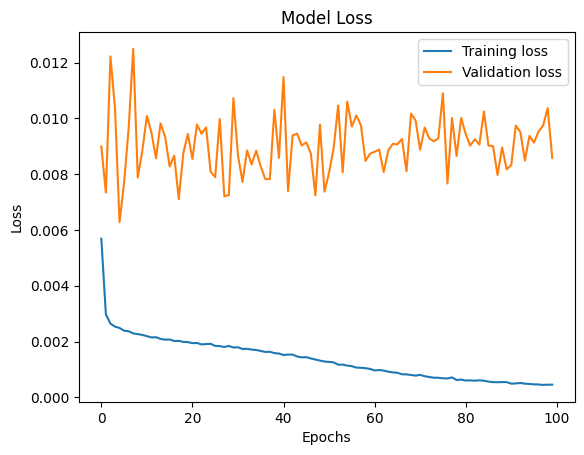

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
y_pred = model.predict(X_test)

y_test_actual = scaler.inverse_transform(np.hstack([X_test[:, -1, :], y_test.reshape(-1, 1)]))[:, -1]
y_pred_actual = scaler.inverse_transform(np.hstack([X_test[:, -1, :], y_pred.reshape(-1, 1)]))[:, -1]

from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f'Root Mean Squared Error (RMSE): {rmse}')


165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Root Mean Squared Error (RMSE): 1559449.636086062


In [23]:
df.describe()

,Datetime,WindDirection,WindSpeedAvg60min,WindGust,Temperature,Sunshineperhour,GlobalRadiation,HorizontalVisibility,CloudCover,AvgDailyTemperature,capacity,volume,percentage,emission,emissionfactor,Year,Month
count,26278,26278.000000,26278.000000,26278.000000,26278.000000,26278.000000,26278.000000,26278.000000,26278.000000,26278.000000,2.627800e+04,2.627800e+04,26278.000000,26278.0,26278.0,26278.000000,26278.000000
mean,2022-07-02 10:30:03.013927936,193.201918,33.127331,65.233275,11.278609,2.198227,45.528731,64.943489,6.043268,11.278377,1.997096e+06,1.997096e+06,0.138017,0.0,0.0,2021.999924,6.525611
min,2021-01-01 00:00:00,0.000000,0.000000,0.000000,-10.400000,0.000000,0.000000,0.000000,0.000000,-5.829167,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,2021.000000,1.000000
25%,2021-10-01 17:15:00,110.000000,20.000000,40.000000,6.500000,0.000000,0.000000,61.000000,4.000000,6.841667,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,2021.000000,4.000000
50%,2022-07-02 10:30:00,200.000000,30.000000,60.000000,10.900000,0.000000,2.000000,70.000000,8.000000,10.925000,6.682150e+04,6.682150e+04,0.004756,0.0,0.0,2022.000000,7.000000
75%,2023-04-02 03:45:00,260.000000,40.000000,80.000000,16.100000,3.000000,64.000000,75.000000,8.000000,16.433333,3.003533e+06,3.003533e+06,0.218114,0.0,0.0,2023.000000,10.000000
max,2023-12-31 22:00:00,990.000000,150.000000,310.000000,35.300000,10.000000,351.000000,83.000000,9.000000,26.866667,1.683231e+07,1.683231e+07,0.932454,0.0,0.0,2023.000000,12.000000
std,NaN,124.072629,17.734448,34.503155,6.698246,3.649901,73.348203,17.520688,3.050711,6.036346,3.174842e+06,3.174842e+06,0.211899,0.0,0.0,0.816497,3.447717


Root Mean Squared Error (RMSE): 1654523.719670854